<a href="https://colab.research.google.com/github/Tristant2005/ML-Projects-Master/blob/main/Qtaro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **UTTT Bot 🗿🗿🗿**
Ultimate Tick Tac Toe bot, Qtaro

In [ ]:
''' core imports '''
import numpy as np
import matplotlib.pyplot as plt

''' development imports'''
from time import perf_counter
from tqdm import tqdm

''' visualization imports '''
from matplotlib.colors import LinearSegmentedColormap
cmap = LinearSegmentedColormap.from_list('mycmap', ['lightgrey', 'white'])
import matplotlib.colors as mcolors
tab10_names = list(mcolors.TABLEAU_COLORS) # create a list of colours

def checkerboard(shape):
    # from https://stackoverflow.com/questions/2169478/how-to-make-a-checkerboard-in-numpy
    return np.indices(shape).sum(axis=0) % 2

In [ ]:
class Qtaro:
    '''
    demonstrates the two minimal functions for an agent
    '''
    def __init__(self, name: str = 'Qtaro'):
        self.name = name

    def move(self, board_dict: dict) -> tuple:
        '''
        the keywords for board_dict are:
        board_state: a 9x9 np.array showing which squares have which markers.
                     your markers at +1 and your opponent markers are -1.
                     open squares are 0
        active_box:  the coordinate for the active mini-board (indicates which 3x3 is currently playable)
                     a value of (-1, -1) is used if the whole board is valid
        valid_moves: a list of tuples indicating which positions are valid (in the 9x9 format)

        '''
        # return board_dict['valid_moves'][0]
        random_index = np.random.choice(len(board_dict['valid_moves']))
        return board_dict['valid_moves'][random_index]
        # pass

In [ ]:
class Jotaro:
    '''
    this could use a significant refactor
    this provides a lot of methods to pull and remix
    really doesn't use valid_moves
    (valid moves can be determined from board_state and active_box)

    it's not very strong. you should be able to beat this fairly easily.
    '''

    ''' ------------------ required function ---------------- '''

    def __init__(self,name: str = 'Jotaro') -> None:
        self.name = name

    def move(self, board_dict: dict) -> tuple:
        ''' wrapper
        apply the logic and returns the desired move
        '''
        # return tuple(self.heuristic_mini_to_major(board_state = board_dict['board_state'],
        #                                           active_box = board_dict['active_box'],
        #                                           valid_moves = board_dict['valid_moves']))

        # random_index = np.random.choice(len(board_dict['valid_moves']))

        box = self.pull_mini_board(board_dict['board_state'], board_dict['active_box'])
        # if (self._check_line_playerwise(box)):
        #   print("line found")
        # else:
        #   print("no line found")

        # print(box)
        # if (self._check_line_playerwise(box, None) == True):
        #   if (self._check_line_playerwise(box, 1)):
        #     print(":3")
        #     moves = self.make_imminent(box)
        #     random_index = np.random.choice(len(moves))
        #     return moves[random_index]
        #   elif (self._check_line_playerwise(box, -1)):
        #     print("8==D")
        #     moves = self.block_imminent(box)
        #     random_index = np.random.choice(len(moves))
        #     return moves[random_index]


          # print("idk what Im doing")
        # for move in board_dict['valid_moves']:
          # if (self._check_line(move)):
            # return move
            # print(type(board_dict['valid_moves']))

        # print(board_dict["board_state"])

        moves1 = self.make_imminent(box)

        # print(moves1)
        moves2 = self.block_imminent(box)
        # print(moves2)

        if (len(moves1) == 0): #it can't take a box
          if (len(moves2) == 0): #it can't block an opponent
            # print("???")

            e = self.paly_next_to(box, board_dict)
            # print(e)
            # print(board_dict['valid_moves'])
            if (len(e) == 0):
              # print("we had nothing")
              # random_index = np.random.choice(len(board_dict['valid_moves']))
              # return board_dict['valid_moves'][random_index]
              return tuple(self.heuristic_mini_to_major(board_state = board_dict['board_state'],
                                                        active_box = board_dict['active_box'],
                                                        valid_moves = board_dict['valid_moves']))
            else:
              # print("try")
              stuffz = tuple(self.heuristic_mini_to_major(board_state = board_dict['board_state'],
                                                          active_box = board_dict['active_box'],
                                                          valid_moves = e))
              # print("what we chose to do " + str(stuffz))
              return stuffz

          else:
            return tuple(moves2[0])

        else: #it can take a box
          try:
            return tuple(moves1[0])
          except:
            print("what the fudge?") #idk why this is happening because moves1 should be greater than zero
            return -1



      # return board_dict['valid_moves'][random_index]


    ''' --------- generally useful bot functions ------------ '''

    def _check_line(self, box: np.array) -> bool:
        '''
        box is a (3,3) array
        returns True if a line is found, else returns False '''
        for i in range(3):
            if abs(sum(box[:,i])) == 3: return True # horizontal
            if abs(sum(box[i,:])) == 3: return True # vertical

        # diagonals
        if abs(box.trace()) == 3: return True
        if abs(np.rot90(box).trace()) == 3: return True
        return False

    def _check_line_playerwise(self, box: np.array, player: int = None):
        ''' returns true if the given player has a line in the box, else false
        if no player is given, it checks for whether any player has a line in the box'''
        if player == None:
            return self._check_line(box)
        if player == -1:
            box = box * -1
        box = np.clip(box,0,1)
        return self._check_line(box)

    def paly_next_to(self, box, board_dict) -> list:
      imminent = [] #all the positions there's an x
      # np.zeros((3,3))

      active_box = board_dict["active_box"]
      # print("active box: " + str(board_dict["active_box"]))


      for e, x in enumerate(box):
        for v, num in enumerate(x):
          if num == 1:
            # print("there is a 1 at: ", e, v)

            # print(self.pull_mini_board(board_dict["board_state"], board_dict["active_box"]))

            # print(board_dict["board_state"])
            # print("therefore 1 at: ", str(active_box[0]*3 + e), str(active_box[1]*3 + v))
            # print(active_box[1]*3 + e, active_box(2)*3 + v)


            if e != 2:
              if (box[e+1][v]) == 0:
                imminent.append([active_box[0]*3 + e+1, active_box[1]*3 + v])

              if v != 2:
                if (box[e+1][v+1]) == 0:
                  imminent.append([active_box[0]*3 + e+1, active_box[1]*3 + v+1])

              if v != 0:
                if (box[e+1][v-1]) == 0:
                  imminent.append([active_box[0]*3 + e+1, active_box[1]*3 + v-1])


            if e != 0:
              if (box[e-1][v]) == 0:
                imminent.append([active_box[0]*3 + e-1, active_box[1]*3 + v])

              if v != 2:
                 if (box[e-1][v+1]) == 0:
                  imminent.append([active_box[0]*3 + e-1, active_box[1]*3 + v+1])

              if v != 0:
                 if (box[e-1][v-1]) == 0:
                  imminent.append([active_box[0]*3 + e-1, active_box[1]*3 + v-1])


            if v != 2:
              if (box[e][v+1]) == 0:
                imminent.append([active_box[0]*3 + e, active_box[1]*3 + v+1])

            if v != 0:
              if (box[e][v-1]) == 0:
                imminent.append([active_box[0]*3 + e, active_box[1]*3 + v-1])




            # if (box[e][v-1]) == 0:
            #   imminent.append([e, v-1])


            # if (box[e+1][v-1]) == 0:
            #   imminent.append([e+1, v-1])

            # print(box[e][v])

            # position_list = [e, v]
            # imminent.append(position_list)
      # print("what we can do: " + str(board_dict["valid_moves"]))
      # print("what we want to do: "  + str(imminent))
      return imminent

      # for _valid in zip(*self.get_valid(box)):
      #     # create temp valid pattern
      #     valid_filter = np.zeros((3,3))


    def pull_mini_board(self, board_state: np.array, mini_board_index: tuple) -> np.array:
        ''' extracts a mini board from the 9x9 given the its index'''
        temp = board_state[mini_board_index[0]*3:(mini_board_index[0]+1)*3,
                           mini_board_index[1]*3:(mini_board_index[1]+1)*3]
        return temp

    def get_valid(self, mini_board: np.array) -> np.array:
        ''' gets valid moves in the miniboard'''
        return np.where(mini_board == 0)


    def get_finished(self, board_state: np.array) -> np.array:
        ''' calculates the completed boxes'''
        opp_boxes = np.zeros((3,3))
        self_boxes = np.zeros((3,3))
        stale_boxes = np.zeros((3,3))
        # look at each miniboard separately
        for _r in range(3):
            for _c in range(3):
                temp_miniboard = self.pull_mini_board(board_state, (_r,_c))
                self_boxes[_r,_c] = self._check_line_playerwise(temp_miniboard, player = 1)
                opp_boxes[_r,_c] = self._check_line_playerwise(temp_miniboard, player = -1)
                if sum(abs(temp_miniboard.flatten())) == 9:
                    stale_boxes[_r,_c] = 1

        # return finished boxes (separated by their content)
        return (opp_boxes*-1, self_boxes, stale_boxes)

    def convert_pos_to_int(self, position: tuple) -> int:
        ''' converts a tuple to a unique location on the board represented by an integer
        (2,4) -> 18 + 4 -> 22 '''
        # comparing tuples is irritating, comparing integers is much easier
        return position[0] * 9 + position[1]

    def block_imminent(self, mini_board: np.array) -> list:
        ''' tries to block the opponent if they have 2/3rds of a line '''
        # loop through valid moves with enemy position there.
        # if it makes a line it's imminent
        imminent = list()

        for _valid in zip(*self.get_valid(mini_board)):
            # create temp valid pattern
            valid_filter = np.zeros((3,3))
            valid_filter[_valid[0],_valid[1]] = -1
            if self._check_line(mini_board + valid_filter):
                imminent.append(_valid)
        return imminent

    def make_imminent(self, mini_board: np.array) -> list:
      ''' tries to block the opponent if they have 2/3rds of a line '''
      # loop through valid moves with enemy position there.
      # if it makes a line it's imminent
      imminent = list()

      for _valid in zip(*self.get_valid(mini_board)):
          # create temp valid pattern
          valid_filter = np.zeros((3,3))
          valid_filter[_valid[0],_valid[1]] = 1
          if self._check_line(mini_board + valid_filter):
              imminent.append(_valid)
      return imminent

      def count_spaces(self, player: int) -> int:
        pass


    ''' ------------------ bot specific logic ---------------- '''

    def heuristic_mini_to_major(self, board_state: np.array,
                                active_box: tuple,
                                valid_moves: list) -> tuple:
        '''
        either applies the heuristic to the mini-board or selects a mini-board (then applies the heuristic to it)
        '''

        if active_box != (-1,-1):
            # look just at the mini board
            temp_miniboard = self.pull_mini_board(board_state, active_box)
            # look using the logic, select a move
            move = self.mid_heuristic(temp_miniboard)
            # project back to original board space
            return (move[0] + 3 * active_box[0],
                    move[1] + 3 * active_box[1])

        else:
            # use heuristic on finished boxes to select which box to play in
            imposed_active_box = self.major_heuristic(board_state)

            # call this function with the self-imposed active box
            return self.heuristic_mini_to_major(board_state = board_state,
                                           active_box = imposed_active_box,
                                           valid_moves = valid_moves)

    def major_heuristic(self, board_state: np.array) -> tuple:
        '''
        determines which miniboard to play on
        note: having stale boxes was causing issues where the logic wanted to block
              the opponent but that mini-board was already finished (it was stale)
        '''
        z = self.get_finished(board_state)
        # finished boxes is a tuple of 3 masks: self, opponent, stale
        self_boxes  = z[0]
        opp_boxes   = z[1]
        stale_boxes = z[2]

        # identify imminent wins
        imminent_wins = self.block_imminent(self_boxes + opp_boxes)

        # make new list to remove imminent wins that point to stale boxes
        stale_boxes = list(zip(*np.where(stale_boxes)))
        for stale_box in stale_boxes:
            if stale_box in imminent_wins:
                imminent_wins.remove(stale_box)
        if len(imminent_wins) > 0:
            return imminent_wins[np.random.choice(len(imminent_wins))]

        # take center if available
        internal_valid = list(zip(*self.get_valid(self_boxes + opp_boxes)))
        for stale_box in stale_boxes:
            if stale_box in internal_valid:
                internal_valid.remove(stale_box)

        if (1,1) in internal_valid:
            return (1,1)

        # else take random corner
        _corners = [(0,0),(0,2),(0,2),(2,2)]
        _valid_corner = list()

        for _corner in _corners:
            if _corner in internal_valid:
                _valid_corner.append(_corner)
        if len(_valid_corner) > 0:
            return _valid_corner[np.random.choice(len(_valid_corner))]

        # else take random
        return internal_valid[np.random.choice(len(internal_valid))]

    def mid_heuristic(self, miniboard: np.array) -> tuple:
        ''' main mini-board logic '''
        # block imminent wins on this miniboard
        imminent_wins = self.block_imminent(miniboard)
        if len(imminent_wins) > 0:
            return imminent_wins[np.random.choice(len(imminent_wins))]

        # take center if available
        internal_valid = list(zip(*self.get_valid(miniboard)))
        if (1,1) in internal_valid:
            return (1,1)

        # else take random corner
        _corners = [(0,0),(0,2),(0,2),(2,2)]
        _valid_corner = list()

        for _corner in _corners:
            if _corner in internal_valid:
                _valid_corner.append(_corner)
        if len(_valid_corner) > 0:
            return _valid_corner[np.random.choice(len(_valid_corner))] # must convert back to full board tuple

        # else take random
        return internal_valid[np.random.choice(len(internal_valid))]

In [ ]:
class finns_heuristic_bot:
    '''
    this could use a significant refactor
    this provides a lot of methods to pull and remix
    really doesn't use valid_moves
    (valid moves can be determined from board_state and active_box)

    it's not very strong. you should be able to beat this fairly easily.
    '''

    ''' ------------------ required function ---------------- '''

    def __init__(self,name: str = 'Aljoscha') -> None:
        self.name = name

    def move(self, board_dict: dict) -> tuple:
        ''' wrapper
        apply the logic and returns the desired move
        '''
        return tuple(self.heuristic_mini_to_major(board_state = board_dict['board_state'],
                                                  active_box = board_dict['active_box'],
                                                  valid_moves = board_dict['valid_moves']))


    ''' --------- generally useful bot functions ------------ '''

    def _check_line(self, box: np.array) -> bool:
        '''
        box is a (3,3) array
        returns True if a line is found, else returns False '''
        for i in range(3):
            if abs(sum(box[:,i])) == 3: return True # horizontal
            if abs(sum(box[i,:])) == 3: return True # vertical

        # diagonals
        if abs(box.trace()) == 3: return True
        if abs(np.rot90(box).trace()) == 3: return True
        return False

    def _check_line_playerwise(self, box: np.array, player: int = None):
        ''' returns true if the given player has a line in the box, else false
        if no player is given, it checks for whether any player has a line in the box'''
        if player == None:
            return self._check_line(box)
        if player == -1:
            box = box * -1
        box = np.clip(box,0,1)
        return self._check_line(box)

    def pull_mini_board(self, board_state: np.array, mini_board_index: tuple) -> np.array:
        ''' extracts a mini board from the 9x9 given the its index'''
        temp = board_state[mini_board_index[0]*3:(mini_board_index[0]+1)*3,
                           mini_board_index[1]*3:(mini_board_index[1]+1)*3]
        return temp

    def get_valid(self, mini_board: np.array) -> np.array:
        ''' gets valid moves in the miniboard'''
        return np.where(mini_board == 0)


    def get_finished(self, board_state: np.array) -> np.array:
        ''' calculates the completed boxes'''
        opp_boxes = np.zeros((3,3))
        self_boxes = np.zeros((3,3))
        stale_boxes = np.zeros((3,3))
        # look at each miniboard separately
        for _r in range(3):
            for _c in range(3):
                temp_miniboard = self.pull_mini_board(board_state, (_r,_c))
                self_boxes[_r,_c] = self._check_line_playerwise(temp_miniboard, player = 1)
                opp_boxes[_r,_c] = self._check_line_playerwise(temp_miniboard, player = -1)
                if sum(abs(temp_miniboard.flatten())) == 9:
                    stale_boxes[_r,_c] = 1

        # return finished boxes (separated by their content)
        return (opp_boxes*-1, self_boxes, stale_boxes)

    def convert_pos_to_int(self, position: tuple) -> int:
        ''' converts a tuple to a unique location on the board represented by an integer
        (2,4) -> 18 + 4 -> 22 '''
        # comparing tuples is irritating, comparing integers is much easier
        return position[0] * 9 + position[1]

    def convert_pos_to_int(self, position: tuple) -> int:
        '''
        currently unused

        converts a tuple to a unique location on the board represented by an integer
        (2,4) -> 18 + 4 -> 22 '''
        # comparing tuples is irritating, comparing integers is much easier
        return position[0] * 9 + position[1]

    def block_imminent(self, mini_board: np.array) -> list:
        ''' tries to block the opponent if they have 2/3rds of a line '''
        # loop through valid moves with enemy position there.
        # if it makes a line it's imminent
        imminent = list()

        for _valid in zip(*self.get_valid(mini_board)):
            # create temp valid pattern
            valid_filter = np.zeros((3,3))
            valid_filter[_valid[0],_valid[1]] = -1
            if self._check_line(mini_board + valid_filter):
                imminent.append(_valid)
        return imminent


    ''' ------------------ bot specific logic ---------------- '''

    def heuristic_mini_to_major(self, board_state: np.array,
                                active_box: tuple,
                                valid_moves: list) -> tuple:
        '''
        either applies the heuristic to the mini-board or selects a mini-board (then applies the heuristic to it)
        '''

        if active_box != (-1,-1):
            # look just at the mini board
            temp_miniboard = self.pull_mini_board(board_state, active_box)
            # look using the logic, select a move
            move = self.mid_heuristic(temp_miniboard)
            # project back to original board space
            return (move[0] + 3 * active_box[0],
                    move[1] + 3 * active_box[1])

        else:
            # use heuristic on finished boxes to select which box to play in
            imposed_active_box = self.major_heuristic(board_state)

            # call this function with the self-imposed active box
            return self.heuristic_mini_to_major(board_state = board_state,
                                           active_box = imposed_active_box,
                                           valid_moves = valid_moves)

    def major_heuristic(self, board_state: np.array) -> tuple:
        '''
        determines which miniboard to play on
        note: having stale boxes was causing issues where the logic wanted to block
              the opponent but that mini-board was already finished (it was stale)
        '''
        z = self.get_finished(board_state)
        # finished boxes is a tuple of 3 masks: self, opponent, stale
        self_boxes  = z[0]
        opp_boxes   = z[1]
        stale_boxes = z[2]

        # identify imminent wins
        imminent_wins = self.block_imminent(self_boxes + opp_boxes)

        # make new list to remove imminent wins that point to stale boxes
        stale_boxes = list(zip(*np.where(stale_boxes)))
        for stale_box in stale_boxes:
            if stale_box in imminent_wins:
                imminent_wins.remove(stale_box)
        if len(imminent_wins) > 0:
            return imminent_wins[np.random.choice(len(imminent_wins))]

        # take center if available
        internal_valid = list(zip(*self.get_valid(self_boxes + opp_boxes)))
        for stale_box in stale_boxes:
            if stale_box in internal_valid:
                internal_valid.remove(stale_box)

        if (1,1) in internal_valid:
            return (1,1)

        # else take random corner
        _corners = [(0,0),(0,2),(0,2),(2,2)]
        _valid_corner = list()

        for _corner in _corners:
            if _corner in internal_valid:
                _valid_corner.append(_corner)
        if len(_valid_corner) > 0:
            return _valid_corner[np.random.choice(len(_valid_corner))]

        # else take random
        return internal_valid[np.random.choice(len(internal_valid))]

    def mid_heuristic(self, miniboard: np.array) -> tuple:
        ''' main mini-board logic '''
        # block imminent wins on this miniboard
        imminent_wins = self.block_imminent(miniboard)
        if len(imminent_wins) > 0:
            return imminent_wins[np.random.choice(len(imminent_wins))]

        # take center if available
        internal_valid = list(zip(*self.get_valid(miniboard)))
        if (1,1) in internal_valid:
            return (1,1)

        # else take random corner
        _corners = [(0,0),(0,2),(0,2),(2,2)]
        _valid_corner = list()

        for _corner in _corners:
            if _corner in internal_valid:
                _valid_corner.append(_corner)
        if len(_valid_corner) > 0:
            return _valid_corner[np.random.choice(len(_valid_corner))] # must convert back to full board tuple

        # else take random
        return internal_valid[np.random.choice(len(internal_valid))]

# **Game Engine**


In [ ]:
class uttt_engine():
    def __init__(self):
        self.active_box = (-1,-1)    # (-1,-1) means any box can be played in
        self.board_state = np.zeros((9,9))
        self.finished_boxes = np.zeros((3,3)) # 1 for agent1, -1 for agent2. "6" indicates stalemate
        self.finished = False
        self.finished_win = False
        self.finished_stale = False
        self.current_player = 1 # starting player
        self.game_log = ''

    ''' -------------- Initialization ------'''
    def load_agents(self, agent1: Qtaro, agent2: Qtaro) -> None:
        ''' agent1 and agent2 are uttt agents '''
        self.agents = [agent1, agent2]

    ''' --------------- Logging ----------- '''

    def get_game_log(self) -> str:
        ''' returns the current game encoding (for visualization) '''
        return self.game_log

    def log_move(self, position: tuple) -> None:
        # convert tuple to string, append character to existing game code
        offset = 32
        self.game_log += (chr(position[0]*9 + position[1] + offset))

    def load_game(self, game_string:str) -> None:
        ''' assumes the game string is valid (this is not strictly enforced) '''
        for encoded_position in game_string:
            # update game board
            self.move(self.unconvert(encoded_position), log=False)

    def unconvert(self, symbol):
        ''' part of loading a game from a string '''
        offset = 32
        int_position = ord(symbol) - offset
        return (int_position//9, int_position%9)

    ''' ------------- Logic --------------- '''

    def get_query_dict(self) -> dict:
        ''' can be used in development to understand what the bot is being provided for logic '''
        return {'board_state': self.board_state * self.current_player,
                'active_box':  self.active_box,
                'valid_moves': self.get_valid_moves()}

    def query_player(self, loud: bool = False) -> None:
        '''
        send a request to a player instance for a move
        updates the game board with the desired move
        if no valid move is returned, a random move is played for that agent
        the "loud" argument can be used to hear/silence warnings
        '''
        # check agents are loaded
        if not hasattr(self, 'agents'):
            print('must load agents')
            return

        # check game is not finished
        if self.finished:
            print('no valid moves in terminal state')
            #print("(something went wrong, you shouldn't be here)")
            #print('put in a "game_finished" check somewhere')
            return

        # send the request with board information in the form of a dictionary
        temp_valid_moves = self.get_valid_moves()
        temp_valid_moves = [tuple(x) for x in temp_valid_moves]

        try:
            desired_move = tuple(self.agents[0].move(self.get_query_dict()))
            if desired_move not in temp_valid_moves:
                random_index = np.random.choice(np.arange(len(temp_valid_moves)))
                desired_move = tuple(temp_valid_moves[random_index])
                if loud:
                    print(f'warning: {self.agents[0].name} played an invalid move. converting to random valid alternative')
            # update board
            self.move(position = desired_move)

        except:
            # shouldn't get here, but this chunk of code exists for safety
            if loud:
                print(f'warning: exception raised in "query" for {self.agents[0].name}')
            random_index = np.random.choice(np.arange(len(temp_valid_moves)))
            desired_move = tuple(temp_valid_moves[random_index])

            # update board
            self.move(position = desired_move)

    def switch_active_player(self) -> None:
        ''' switch the current player value and the agent list '''
        # this is called at the end of .move()
        self.agents = self.agents[::-1]
        self.current_player *= -1

    def getwinner(self) -> int:
        ''' new method
        returns the integer indicating the winning player
        (subject to change)
        '''
        if self.finished:
            if self.finished_win:
                return self.current_player
            else:
                return 0

    def check_validity(self, position: tuple) -> bool:
        ''' check whether position - a tuple - is valid '''
        box_validity = (self.active_box == self.map_to_major(position)) \
                        or (self.active_box == (-1,-1))
        open_validity = (self.board_state[position] == 0)
        return box_validity and open_validity

    def check_line(self, box: np.array) -> bool:
        '''
        box is a (3,3) array (typically a mini-board)
        returns True if a line is found
        '''
        for i in range(3):
            if abs(sum(box[:,i])) == 3: return True # horizontal
            if abs(sum(box[i,:])) == 3: return True # vertical

        # diagonals
        if abs(box.trace()) == 3: return True
        if abs(np.rot90(box).trace()) == 3: return True

    def map_to_major(self, position: tuple) -> tuple:
        '''
        converts position to major coordinates
        eg: (5,3) -> (1,1)
        '''
        return(position[0]//3, position[1]//3)

    def map_to_minor(self, position: tuple) -> tuple:
        '''
        converts position into mini coordinates
        eg: (5,3) -> (2,0)
        '''
        return (position[0]%3, position[1]%3)

    def check_full_stale(self) -> None:
        ''' this might be impossible? '''
        # get number of invalid boxes

        if (self.finished_boxes == 0).sum() == 0:
            self.finished_stale = True
            self.finished = True

    def move(self, position: tuple, log: bool = True) -> None:
        '''
        the main game logic. board updates and logic checks.
        '''
        if self.finished:
            print('no move played, game is finished')
            return

        if self.check_validity(position):

            # log move
            if log:
                self.log_move(position)

            # place marker
            self.board_state[position] = self.current_player

            # select both scales
            temp_box = self.map_to_major(position)
            temp_minor_box = self.board_state[3*temp_box[0]:3*temp_box[0]+3,
                                              3*temp_box[1]:3*temp_box[1]+3]

            ''' check line at minor scale '''
            if self.check_line(temp_minor_box):
                self.finished_boxes[self.map_to_major(position)] = self.current_player

                # check line at major scale
                if self.check_line(self.finished_boxes):
                    self.finished_win = True
                    self.finished = True
                    return # end the whole thing immediately (will cause stalemate bug without this !)

            # if no squares are open, mark as stale
            elif (temp_minor_box == 0).sum() == 0:
                self.finished_boxes[self.map_to_major(position)] = 6 # indicates stalemate in that box

            ''' is the whole game board stale? '''
            # if it's stale, set the appropriate flags
            self.check_full_stale()

            ''' calculate active box '''
            self.active_box = self.map_to_minor(position)
            # if that box is won or stale flag it
            if self.finished_boxes[self.active_box] != 0:
                self.active_box = (-1,-1)

            # switch player
            self.switch_active_player()

    def get_valid_moves(self) -> np.array:
        '''
        returns an array (N,2) of valid moves
        '''

        if self.finished:
            print('no valid moves in terminal state')
            return np.empty(0)
        # define masks that cover the board
        # across the whole board
        full_board_mask = (self.board_state == 0)
        # active square
        active_box_mask = np.zeros((9,9),dtype=bool)
        # identifies finished major boxes
        a = np.repeat(self.finished_boxes,3).reshape(3,9)
        b = np.tile(a,3).reshape(9,9)
        finished_box_mask = (b == 0)

        if self.active_box == (-1,-1):
            active_box_mask[:] = True
            active_box_mask *= finished_box_mask
        else:
            active_box_mask[3*self.active_box[0]:3*self.active_box[0]+3,
                            3*self.active_box[1]:3*self.active_box[1]+3] = True

        # return get union of maps
        return np.array(np.where(active_box_mask * full_board_mask)).T

    ''' ------------- Visualization ------- '''

    def draw_valid_moves(self) -> None:
        ''' visualization tool
        plots the valid moves as purple squares
        to be called after the .draw_board() method
        '''
        moves = self.get_valid_moves()
        plt.scatter(moves[:,0],moves[:,1],marker='s',c='purple',alpha=0.3, s=50)

    def draw_board(self, marker_size: int = 100, ticks: str = 'off') -> None:
        ''' visualization tool
        plots a checkerboard and markers for all plays.
        lines distinguish mini-boards and finished boards are coloured in
        '''
        plt.imshow(checkerboard((9,9)), cmap=cmap, origin='lower')
        for i in [-0.5,2.5,5.5, 8.5]:
            plt.axvline(i,c='k')
            plt.axhline(i,c='k')

        if ticks == 'off':
            plt.axis('off')
        else:
            plt.xticks(np.arange(9))

        plt.scatter(*np.where(self.board_state == -1), marker='x', s=marker_size, c='tab:blue')
        plt.scatter(*np.where(self.board_state == 1),  marker='o', s=marker_size, c='tab:orange')

        x_boxes = np.where(self.finished_boxes == -1)
        o_boxes = np.where(self.finished_boxes == 1)
        plt.scatter(x_boxes[0]*3+1,x_boxes[1]*3+1,marker='s',s=marker_size*50,alpha=0.6,c='tab:blue')
        plt.scatter(o_boxes[0]*3+1,o_boxes[1]*3+1,marker='s',s=marker_size*50,alpha=0.6,c='tab:orange')

        stale_boxes = np.where(self.finished_boxes == 6)
        plt.scatter(stale_boxes[0]*3+1, stale_boxes[1]*3+1, marker='s', s=marker_size*50, alpha=0.3,c='k')

# **New Section**

In [ ]:
# initialize the engine
engine = uttt_engine()

# load two agents into the game
# We will be overriding some bot logic
engine.load_agents(Qtaro(name = 'Qtaro the TickTack novice'),
                   Jotaro(name = 'Jotaro the TickTack god'))

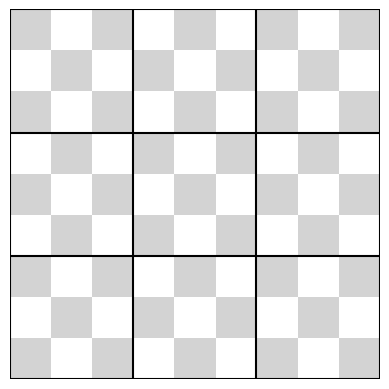

In [ ]:
engine.draw_board()

what we can do: [[0 6]
 [0 7]
 [0 8]
 [1 6]
 [1 7]
 [1 8]
 [2 6]
 [2 7]
 [2 8]]
what we want to do: []
what we can do: [[6 3]
 [6 4]
 [7 3]
 [7 4]
 [7 5]
 [8 3]
 [8 5]]
what we want to do: []


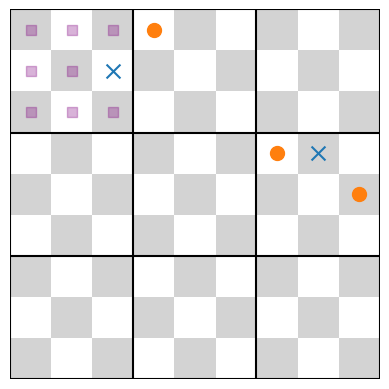

In [ ]:
# note: setting a seed ensures the same game is played because these bots use the np.random module
# np.random.seed(12345)

# Play 5 moves. If the game ends, stop querying the bots
for i in range(5):
    if engine.finished == False:
        engine.query_player()

# draw the board
engine.draw_board()

# draw the valid moves for the current player
engine.draw_valid_moves()

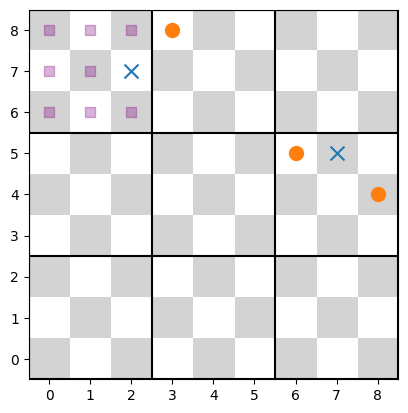

In [ ]:
engine.draw_board(ticks='on')
engine.draw_valid_moves()

In [ ]:
engine.get_query_dict()

{'board_state': array([[-0., -0., -0., -0., -0., -0., -0., -0., -0.],
        [-0., -0., -0., -0., -0., -0., -0., -0., -0.],
        [-0., -0., -0., -0., -0., -0., -0.,  1., -0.],
        [-0., -0., -0., -0., -0., -0., -0., -0., -1.],
        [-0., -0., -0., -0., -0., -0., -0., -0., -0.],
        [-0., -0., -0., -0., -0., -0., -0., -0., -0.],
        [-0., -0., -0., -0., -0., -1., -0., -0., -0.],
        [-0., -0., -0., -0., -0.,  1., -0., -0., -0.],
        [-0., -0., -0., -0., -1., -0., -0., -0., -0.]]),
 'active_box': (0, 2),
 'valid_moves': array([[0, 6],
        [0, 7],
        [0, 8],
        [1, 6],
        [1, 7],
        [1, 8],
        [2, 6],
        [2, 8]])}

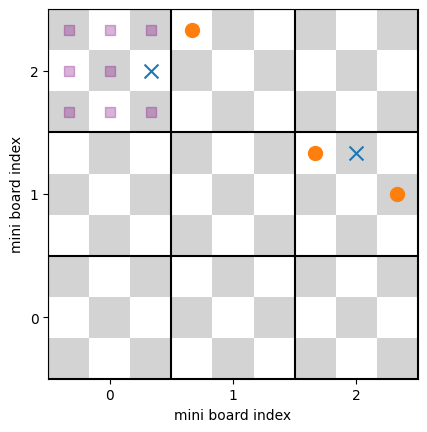

In [ ]:
engine.draw_board()
engine.draw_valid_moves()

# displays the mini-board indices
ax = plt.gca()
ax.axis('on')
ax.set_xlabel('mini board index')
ax.set_ylabel('mini board index')
ax.set_xticks([1,4,7],[0,1,2])
ax.set_yticks([1,4,7],[0,1,2]);

In [ ]:
# query players until the game is finished
while engine.finished == False:
    engine.query_player()

print(engine.agents[0].name, 'wins!')

the bot known as player 1 wins!


In [ ]:
# the game
print(engine.get_game_log())

jobFC0H>!5V"1UpeM_OgB#4^(8ikh&*@/NlmnLJE?$6Y2A)='-PTdSR].[:\3cG<7%Q


In [ ]:
def initialize(engine_instance, n_moves:int) -> None:
    ''' plays some number of random moves to initialize a game '''
    if n_moves%2 != 0:
        print('warning: number of moves should be even!')

    for i in range(n_moves):
        valid_moves = engine_instance.get_valid_moves()
        random_index = np.random.choice(len(valid_moves))
        engine_instance.move(tuple(valid_moves[random_index]))

def run_many_games(agent1: Qtaro,
                   agent2: Jotaro,
                   n_games: int = 1000,
                   n_init_moves: int = 4):
    ''' repeatedly plays games between two bots to evaluate their fraction of wins '''
    # NOTE: this doesn't switch which player goes first. There may be a mild first-player advantage

    wins = list()
    for i in tqdm(range(n_games)):
        finished_flag = False
        engine = uttt_engine()
        engine.load_agents(agent1, agent2)
        initialize(engine, n_moves=n_init_moves)
        while not finished_flag:
            engine.query_player()
            if engine.finished:
                finished_flag = True
        wins.append(engine.getwinner())

    # return stats
    if sum(wins) > 0: print(agent1.name, 'is the overall winner')
    if sum(wins) < 0: print(agent2.name, 'is the overall winner')
    if sum(wins) == 0: print(agent1.name,'and',agent2.name,'are evenly matched')
    return np.array(wins)

In [ ]:
# agent1 = Qtaro(name = 'Qtaro')

agent2 = finns_heuristic_bot(name = "finns_heuristic_bot")
agent1 = Jotaro(name = 'Jotaro')

stats = run_many_games(agent1 = agent1, agent2 = agent2)

100%|██████████| 1000/1000 [00:51<00:00, 19.26it/s]

Jotaro is the overall winner


In [ ]:
print(f'{agent1.name} wins:', sum(stats == 1))
print(f'{agent2.name} wins:', sum(stats == -1))
print('draws:', sum(stats == 0))

Jotaro wins: 298
finns_heuristic_bot wins: 102
draws: 600


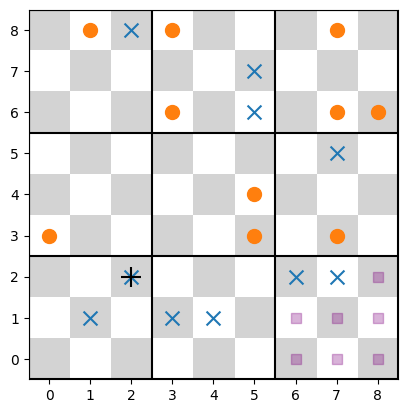

In [ ]:
''' -- initialize a board ... '''
engine = uttt_engine()
engine.load_agents(Qtaro(name = 'the bot known as player 1'),
                   Qtaro(name = 'the second bot'))
''' ... and play some moves randomly -- '''
for i in range(20):
    if engine.finished == False:
        engine.query_player()

''' -- visualize -- '''
engine.draw_board(ticks='on')
engine.draw_valid_moves()



''' -- initialize your bot -- '''
# my_bot = your_bot(name='test version 0.1')
my_bot = Jotaro(name='example logical bot')

''' see what your bot thinks is a good move '''
proposed_move = my_bot.move(engine.get_query_dict())

''' visualize the proposed move '''
plt.scatter(proposed_move[0],proposed_move[1],marker='+',c='k',s=200)